In [2]:
%pip install beautifulsoup4


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/147.9 kB ? eta -:--:--
   -- ------------------------------------- 10.2/147.9 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/147.9 kB 393.8 kB/s eta 0:00:01
   ---------- ---------------------------- 41.0/147.9 kB 393.8 kB/s eta 0:00:01
   ------------------------------- ------ 122.9/147.9 kB 722.1 kB/s eta 0:00:01
   ------------------------------- ------ 122.9/147.9 kB 722.1 kB/s eta 0:00:01
   -------------------------------------- 147.9/147.9 kB 550.7 kB/s eta 0:00:00


In [3]:
# Import de librerías iniciales
import pandas as pd
import os as os
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup


# Variable global para administrar el diccionario actual
parent_dir = os.path.dirname(os.getcwd())

# Ubicación de base de datos
database_name = "/data/database/tfm_jl_eps.db"

C:\Users\jbarquerov\AppData\Local\Temp\ipykernel_65896\66452681.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Business understanding



# Data Understanding

In [4]:
data = pd.read_excel (parent_dir + '/data/raw/Liberty_RedLogistics/UnifiedData.xlsx', sheet_name='UnifiedData')
data.head()

,DUA,Item,Fecha,Aduana,Regimen,Modalidad,Importador,Proveedor,Marca,Modelo,...,Ley 6946 U$S,% DAI,DAI U$S,PROCOMER U$S,% S.C,S.C. U$S,Otros Imp. U$S,Total de Impuestos,Proporción Pr FOB / impuestos,Proporción VA / impuestos
0,005-2022-001495,1,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC SOCIEDAD AN,No disponible,No disponible,No disponible,...,0.43,14,6.04,3,0,0.00,0.11,16.03,0.485758,0.371409
1,005-2022-001495,2,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC SOCIEDAD AN,No disponible,No disponible,No disponible,...,5.61,14,78.49,0,10,63.91,0.00,240.13,0.440048,0.428314
2,005-2022-001495,3,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC SOCIEDAD AN,No disponible,No disponible,No disponible,...,5.76,14,80.65,0,0,0.00,0.00,172.53,0.307551,0.299490
3,005-2022-001495,4,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC SOCIEDAD AN,No disponible,No disponible,No disponible,...,3.58,9,32.23,0,0,0.00,0.00,87.02,0.252232,0.243018
4,005-2022-001495,5,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC SOCIEDAD AN,No disponible,No disponible,No disponible,...,0.64,14,8.94,0,0,0.00,0.00,19.12,0.357450,0.299499


In [5]:
data.describe()

,Item,Fecha,Código SAC,Cantidad Comercial,Volúmen Físico,Bultos,U$S FOB,U$S FOB Unit.,U$S Flete,U$S Seguro,...,ID Agente,IVA - U$S,Ley 6946 U$S,DAI U$S,PROCOMER U$S,S.C. U$S,Otros Imp. U$S,Total de Impuestos,Proporción Pr FOB / impuestos,Proporción VA / impuestos
count,105404.000000,105404,1.054040e+05,105404.000000,105404.000000,105404.000000,105404.000000,105404.000000,105404.000000,105404.000000,...,1.054040e+05,105404.000000,105404.000000,105404.000000,105404.000000,105404.000000,105404.000000,105404.000000,105402.000000,105404.000000
mean,66.423684,2023-02-27 19:55:47.804636928,7.369098e+11,2.040606,1.112801,0.755370,47.985391,41.601530,6.708550,0.509871,...,3.194884e+10,7.477862,0.467006,4.349446,0.066658,1.012944,0.003397,13.377313,0.322604,0.246222
min,1.000000,2022-01-03 00:00:00,2.513109e+11,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.087709e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,2022-10-21 00:00:00,6.206400e+11,1.000000,1.000000,0.000000,9.200000,7.600000,2.330000,0.110000,...,1.104307e+08,1.510000,0.090000,0.000000,0.000000,0.000000,0.000000,2.550000,0.187500,0.141344
50%,46.000000,2023-03-29 00:00:00,8.413300e+11,1.000000,1.000000,1.000000,18.000000,14.185000,3.500000,0.210000,...,1.104307e+08,3.030000,0.190000,1.620000,0.000000,0.000000,0.000000,5.470000,0.339168,0.299297
75%,107.000000,2023-08-30 00:00:00,8.708299e+11,1.000000,1.000000,1.000000,43.200000,36.000000,8.750000,0.490000,...,1.104307e+08,7.170000,0.440000,4.280000,0.000000,0.000000,0.000000,12.850000,0.398927,0.299605
max,480.000000,2023-12-28 00:00:00,9.706900e+11,19100.000000,620.000000,27.000000,5187.000000,2180.130000,1688.190000,79.410000,...,1.862004e+11,994.510000,69.550000,625.910000,3.000000,242.510000,12.000000,1693.100000,32.834559,16.569573
std,64.290480,NaN,1.852013e+11,61.879229,2.149311,0.539786,92.260135,83.381393,11.394331,0.921284,...,7.005235e+10,13.834923,0.902973,9.567987,0.442190,6.349771,0.084418,25.844703,0.229745,0.124798


In [6]:
data['Anno'] = data['DUA'].str[4:8]
# Mover la columna Anno a la primera posición
anno = data.pop('Anno')
data.insert(0, 'Anno', anno)
data.head()

,Anno,DUA,Item,Fecha,Aduana,Regimen,Modalidad,Importador,Proveedor,Marca,...,Ley 6946 U$S,% DAI,DAI U$S,PROCOMER U$S,% S.C,S.C. U$S,Otros Imp. U$S,Total de Impuestos,Proporción Pr FOB / impuestos,Proporción VA / impuestos
0,2022,005-2022-001495,1,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC SOCIEDAD AN,No disponible,No disponible,...,0.43,14,6.04,3,0,0.00,0.11,16.03,0.485758,0.371409
1,2022,005-2022-001495,2,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC SOCIEDAD AN,No disponible,No disponible,...,5.61,14,78.49,0,10,63.91,0.00,240.13,0.440048,0.428314
2,2022,005-2022-001495,3,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC SOCIEDAD AN,No disponible,No disponible,...,5.76,14,80.65,0,0,0.00,0.00,172.53,0.307551,0.299490
3,2022,005-2022-001495,4,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC SOCIEDAD AN,No disponible,No disponible,...,3.58,9,32.23,0,0,0.00,0.00,87.02,0.252232,0.243018
4,2022,005-2022-001495,5,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC SOCIEDAD AN,No disponible,No disponible,...,0.64,14,8.94,0,0,0.00,0.00,19.12,0.357450,0.299499


In [7]:
distinct_values = anno.unique()
print(distinct_values)
# están cargados los datos de 

['2022' '2023']


In [9]:
# salvar el resultado
data.to_csv(parent_dir + '/data/procesed/crc_couriers/crc_unified_data.csv', index=False)



In [97]:
# Se eliminan columnas que no aportan al estudio
#data_liberty = data_liberty.drop("UVF", axis=1)

In [114]:
print(data.columns)

Index(['Anno', 'DUA', 'Item', 'Fecha', 'Aduana', 'Regimen', 'Modalidad',
       'Importador', 'Proveedor', 'Marca', 'Modelo', 'Factura', 'Código SAC',
       'Vía Transporte', 'País de Origen', 'Pais de Procedencia',
       'Pais de Adquisición', 'Cantidad Comercial', 'Unidad de Medida',
       'Volúmen Físico', 'Bultos', 'U$S FOB', 'U$S FOB Unit.', 'U$S Flete',
       'U$S Seguro', 'U$S CIF', 'U$S Unitario', 'Valor en Aduana U$S',
       'Kg netos', 'Kg brutos', 'Descripción de Mercancía', 'ID Declarante',
       'Declarante', 'ID Agente', 'Agente', 'ID Localización ', 'Localización',
       '% IVA', 'IVA - U$S', '% Ley 6946', 'Ley 6946 U$S', '% DAI', 'DAI U$S',
       'PROCOMER U$S', '% S.C', 'S.C. U$S', 'Otros Imp. U$S',
       'Total de Impuestos ', 'Proporción Pr FOB / impuestos ',
       'Proporción VA / impuestos '],
      dtype='object')


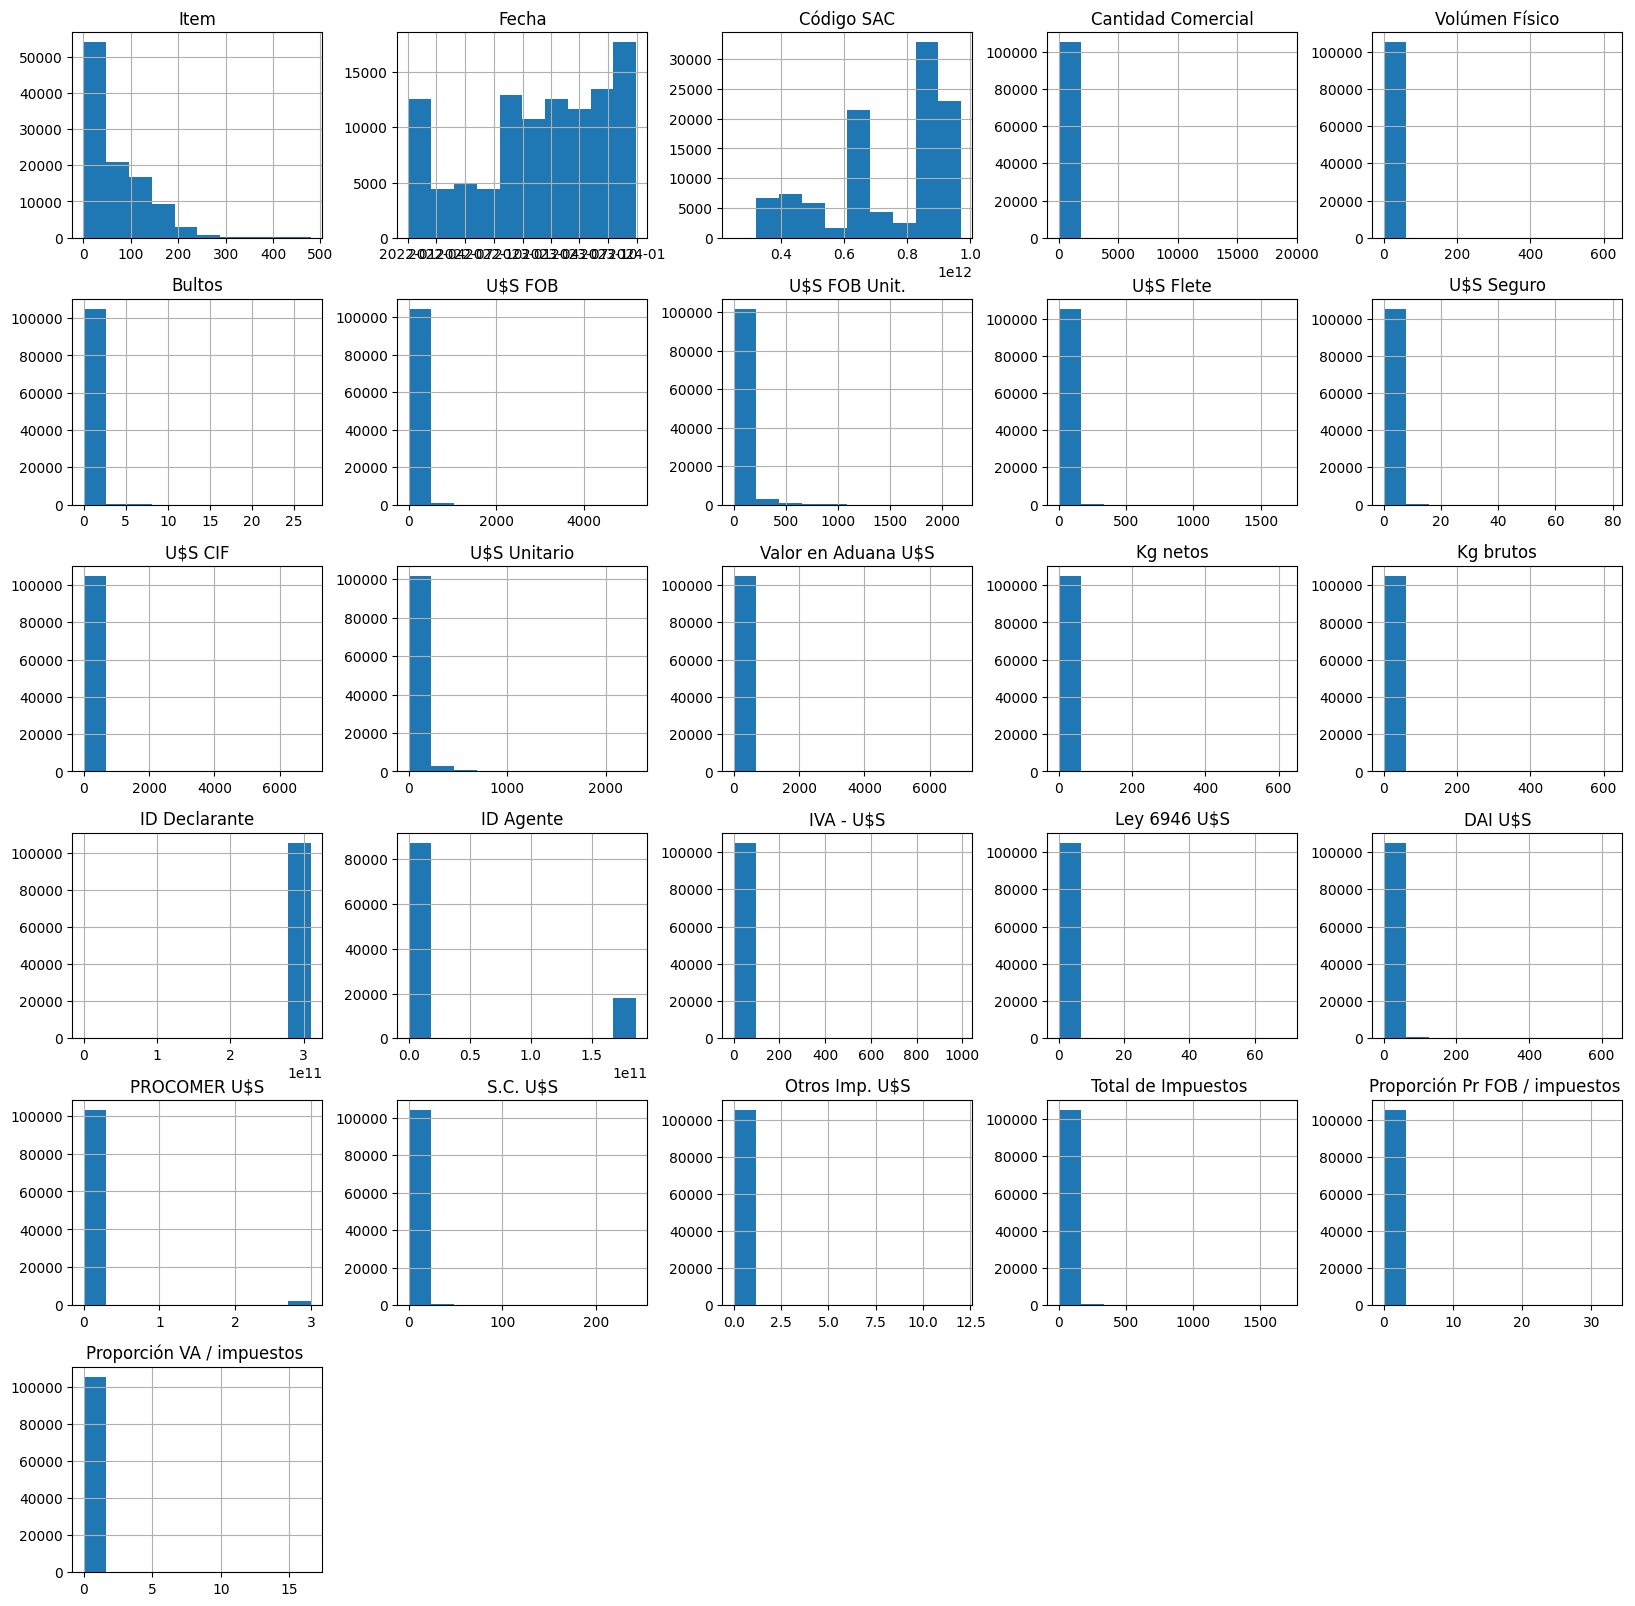

In [116]:
data.hist(figsize=(20, 20))
plt.show()
#bank_data.histo

## Modelado

##  Intento 1 Clusterizar

In [ ]:
#""

In [120]:
# Seteo de floats en 0
float_columns = data.select_dtypes(include=['float']).columns
data[float_columns] = data[float_columns].fillna(0)
#X[float_columns] = X[float_columns].fillna(0)

In [121]:
# pensar: clusterizar los clientes 

import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'
float_columns = data.select_dtypes(include=['float'])
# Select the relevant columns for clustering
X = float_columns

# Instantiate the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
data['cluster'] = labels




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


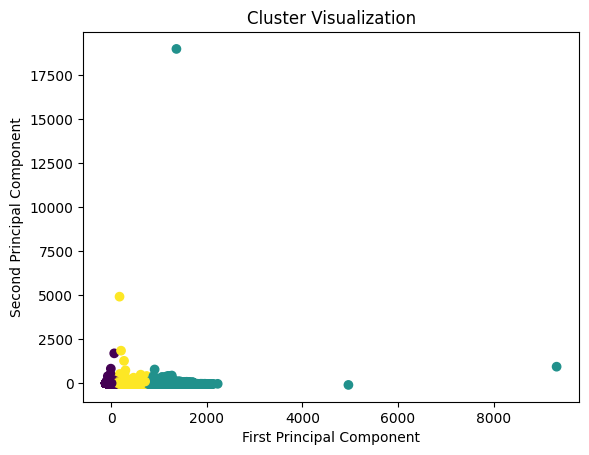

In [123]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the data to two dimensions using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Create a scatter plot of the two PCA components
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['cluster'], cmap='viridis')

# Add labels and title
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Cluster Visualization')

plt.show()

In [122]:
data.head()

,Anno,DUA,Item,Fecha,Aduana,Regimen,Modalidad,Importador,Proveedor,Marca,...,% DAI,DAI U$S,PROCOMER U$S,% S.C,S.C. U$S,Otros Imp. U$S,Total de Impuestos,Proporción Pr FOB / impuestos,Proporción VA / impuestos,cluster
0,2022,005-2022-001495,1,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC SOCIEDAD AN,No disponible,No disponible,...,14,6.04,3,0,0.00,0.11,16.03,0.485758,0.371409,0
1,2022,005-2022-001495,2,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC SOCIEDAD AN,No disponible,No disponible,...,14,78.49,0,10,63.91,0.00,240.13,0.440048,0.428314,1
2,2022,005-2022-001495,3,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC SOCIEDAD AN,No disponible,No disponible,...,14,80.65,0,0,0.00,0.00,172.53,0.307551,0.299490,1
3,2022,005-2022-001495,4,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC SOCIEDAD AN,No disponible,No disponible,...,9,32.23,0,0,0.00,0.00,87.02,0.252232,0.243018,2
4,2022,005-2022-001495,5,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC SOCIEDAD AN,No disponible,No disponible,...,14,8.94,0,0,0.00,0.00,19.12,0.357450,0.299499,0


In [102]:


# URL of the webpage you want to scrape
url = 'https://libertyexpress.com/es-cr/tarifas/'

# Send a GET request to the webpage
response = requests.get(url)

# Parse the HTML content of the page with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table in the HTML
table = soup.find('table')

# Check if table exists before accessing its contents
if table is not None:
    # Get the headers of the table
    headers = [header.text for header in table.find_all('th')]

    # Get the rows of the table
    rows = []
    for row in table.find_all('tr'):
        rows.append([value.text for value in row.find_all('td')])
else:
    headers = []
    rows = []

# Now 'headers' is a list of headers and 'rows' is a list of rows